# Udacity - CRISP-DM Project - In-Depth Review of AirBnB Seattle Data

## Business Understanding

The Project below contains data from Seattle's AirBnb Listings, Calendar availabilty, and user reviews. With this data. I will answer some key steakholder questions.

### Business Questions
1. What neighbourhoods are the most popular?
2. How does the season affect pricing in Seattle?
3. How does the neighborhood affect the pricing in Seattle?
4. How do the property types within neighbourhoods affect the price?
5. How do review ratings affect the price?


### Data Review
Lets read in the 3 files to start and view some of the attributes of the datasets after importing some important packages

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from IPython import display
%matplotlib inline
from collections import Counter

import seaborn as sns #This is for our heatmaps later


In [2]:
#Load in all of the data sets
df_l = pd.read_csv('./seattle/listings.csv')
df_c = pd.read_csv('./seattle/calendar.csv')
df_r = pd.read_csv('./seattle/reviews.csv')


In [3]:
# View Each Dataset

In [4]:
df_c.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df_l.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
df_r.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Explore Calendar Dataset

Important Features of the Calendar Dataset
1. Number of Rows and Columns.
2. Any Missing Values
3. Features of each column


In [7]:
# Find the Shape giving us the Rows and Columns
print("# rows and columns: ", df_c.shape)
# Null values
print("-----------------")
print(df_c.isnull().sum())
print("-----------------")
# % of Missing Values
print('% of Missing values:',(df_c.isnull().sum()/len(df_c))*100)
print("-----------------")
# Describe
print(df_c.describe(include='all'))

# rows and columns:  (1393570, 4)
-----------------
listing_id         0
date               0
available          0
price         459028
dtype: int64
-----------------
% of Missing values: listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64
-----------------
          listing_id        date available    price
count   1.393570e+06     1393570   1393570   934542
unique           NaN         365         2      669
top              NaN  2016-11-04         t  $150.00
freq             NaN        3818    934542    36646
mean    5.550111e+06         NaN       NaN      NaN
std     2.962274e+06         NaN       NaN      NaN
min     3.335000e+03         NaN       NaN      NaN
25%     3.258213e+06         NaN       NaN      NaN
50%     6.118244e+06         NaN       NaN      NaN
75%     8.035212e+06         NaN       NaN      NaN
max     1.034016e+07         NaN       NaN      NaN


#### Observation

Based on the review above, the only missing values are within price (At 32.94%) which could be because of avabilability.

### Explore Listings Dataset

Important Features of the Calendar Dataset
1. Number of Rows and Columns.
2. Any Missing Values
3. Features of each column
4. Look for categorical features


In [8]:
# Find the Shape giving us the Rows and Columns
print("# of rows and columns: ", df_l.shape)
# Null values
print("-----------------")
print(df_l.isnull().sum())
print("-----------------")
print('% of Missing values:',(df_l.isnull().sum()/len(df_l))*100)
print("-----------------")
# Describe
print(df_l.describe(include='all'))

# of rows and columns:  (3818, 92)
-----------------
id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64
-----------------
% of Missing values: id                                   0.000000
listing_url                          0.000000
scrape_id                            0.000000
last_scraped                         0.000000
name                                 0.000000
                                      ...    
cancellation_policy                  0.000000
require_guest_profile_picture        0.000000
require_guest_phone_verification     0.000000
calculated_host_listings_coun

In [9]:
# Get List of all the columns
df_l.select_dtypes(include="object").columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_s

In [10]:
# Inspect Feature - experiences_offered
print('Counts for experiences_offered: ', df_l['experiences_offered'].value_counts())

Counts for experiences_offered:  none    3818
Name: experiences_offered, dtype: int64


### Experiences Offered
All of them are None, so this column does not provide much value in determining price.

In [11]:
# Inspect Feature - Accommodates
print('Counts for transit: ', df_l['accommodates'].value_counts())

Counts for transit:  2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
11       3
14       3
15       2
Name: accommodates, dtype: int64


### Accommodation Amounts
Seems that a Majority of places do between 1-6 people

In [12]:
# Inspect Feature - bedrooms
print('Counts for transit: ', df_l['bedrooms'].value_counts())

Counts for transit:  1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64


### Bedrooms
That is quite odd that 372 of the listings show 0 Bedrooms. Perhaps they are studio apartments where everything is in a single room.

In [13]:
# Inspect Feature - host_location
print('Counts for host_location: ', df_l['host_location'].value_counts())

Counts for host_location:  Seattle, Washington, United States         3259
US                                          246
Spokane, Washington, United States           41
Kent, Washington, United States              34
Los Angeles, California, United States       13
                                           ... 
Accra, Greater Accra, Ghana                   1
SG                                            1
Mount Vernon, Washington, United States       1
West Seattle, Washington                      1
Bangkok, Thailand                             1
Name: host_location, Length: 120, dtype: int64


### Host_Location
Host Location would benefit from some normalization when doing our groupings.

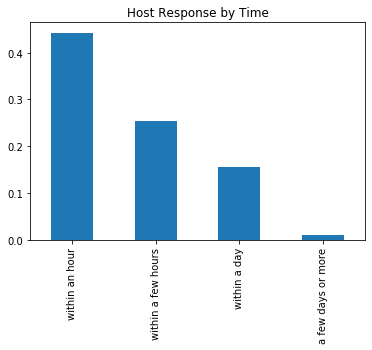

In [14]:
# Inspect Feature - host_response_time
(df_l['host_response_time'].value_counts()/df_l.shape[0]).plot(kind="bar");
plt.title("Host Response by Time");

### Host_Response_Time
Over 90% of hosts response within a day or sooner. Which makes sense as they want to book their property as soon as they can.

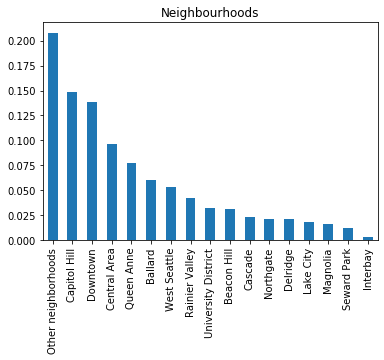

In [15]:
# Inspect Feature - neighborhood_group_cleansed
(df_l['neighbourhood_group_cleansed'].value_counts()/df_l.shape[0]).plot(kind="bar");
plt.title("Neighbourhoods");

### Neighborhood_Group_Cleansed
Seems like the largest single groups are Capitol Hill and the downtown area, 
however the group of other neighbourhoods seems to be much larger

In [16]:
# Need to clean up the string values in the price column to remove $ and commas 
# in order to inspect the price feature and group it as an interger
df_l["price"]=df_l["price"].str.replace('$','')
df_l["price"]=df_l["price"].str.replace(',','')
df_l["price"]=df_l["price"].astype(float)
# This will error if you have ran it already because it will try and find a string when you have already replaced it with a float
# so make sure to clear outputs Lets repeat this for the Calendar Data Set while we are at it
df_c["price"]=df_c["price"].str.replace('$','')
df_c["price"]=df_c["price"].str.replace(',','')
df_c["price"]=df_c["price"].astype(float)


Text(0.5, 0, 'Neighbourhoods')

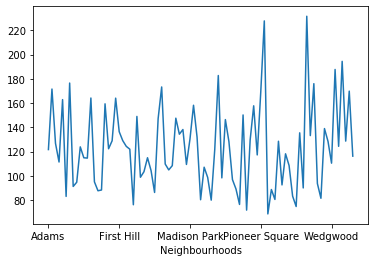

In [17]:
df_l.groupby('neighbourhood_cleansed')['price'].mean().plot()
plt.xlabel('Neighbourhoods')

### Price by Neighbourhood
The graph doesn't let you see well by a specific Neighbourhood but does give you a good general 
sense of the pricing range of all of the Neighbourhoods together


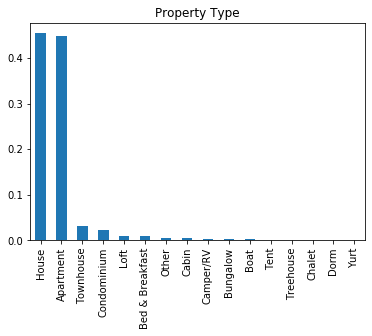

In [18]:
# Insptect Feature - property_type
(df_l['property_type'].value_counts()/df_l.shape[0]).plot(kind="bar");
plt.title("Property Type");

#### Property_Type

Houses and Apartments seem to be the marjority stakeholder for the listings in Seattle.

### Explore Reviews Dataset

Important Features of the Calendar Dataset
1. Number of Rows and Columns.
2. Any Missing Values
3. Features of each column

In [19]:
# Find the Shape giving us the Rows and Columns
print("# of rows and columns: ", df_r.shape)
# Null values
print("-----------------")
print(df_r.isnull().sum())
print("-----------------")
print('% of Missing values:',(df_r.isnull().sum()/len(df_r))*100)
print("-----------------")
# Describe
print(df_r.describe(include='all'))


# of rows and columns:  (84849, 6)
-----------------
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64
-----------------
% of Missing values: listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.021214
dtype: float64
-----------------
          listing_id            id        date   reviewer_id reviewer_name  \
count   8.484900e+04  8.484900e+04       84849  8.484900e+04         84849   
unique           NaN           NaN        1930           NaN         14380   
top              NaN           NaN  2015-09-21           NaN         David   
freq             NaN           NaN         580           NaN           870   
mean    3.005067e+06  3.058765e+07         NaN  1.701301e+07           NaN   
std     2.472877e+06  1.636613e+07         NaN  1.353704e+07           NaN   
min     4.291000e+03  3.721000e+03      

## 1. What neighbourhoods are the most popular?

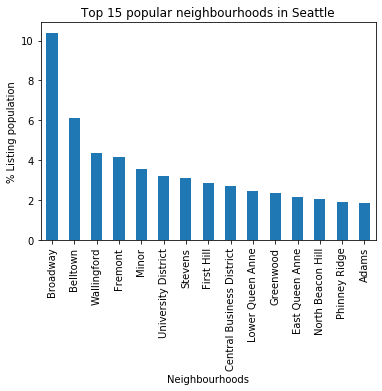

In [20]:
###identifying the top 15 popular neighbour hoods
loca=df_l['neighbourhood_cleansed'].value_counts()

((loca[0:15]/df_l.shape[0])*100).plot(kind="bar");
plt.ylabel('% Listing population')
plt.xlabel('Neighbourhoods')
plt.title("Top 15 popular neighbourhoods in Seattle");

## Answer
The top three neighbourhoods command over 20% of the listings from the listing dataset. Broadway, Belltown and Wallingford.

## 2 - How does the season affect pricing in Seattle?

Since we have already done some cleaning by removing the commas and dollar signs from the price we should be able to graph by the month and year with our data. Year being important because January is there twice.

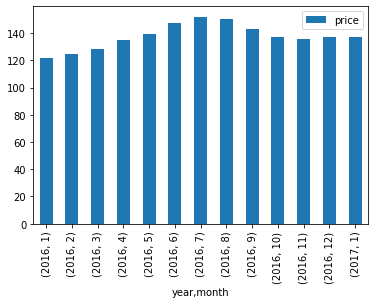

In [21]:
# Average price by month 
df_c['year'] = pd.DatetimeIndex(df_c['date']).year
df_c['month'] = pd.DatetimeIndex(df_c['date']).month
df_c.groupby(['year','month'])[['price']].mean().plot(kind="bar");

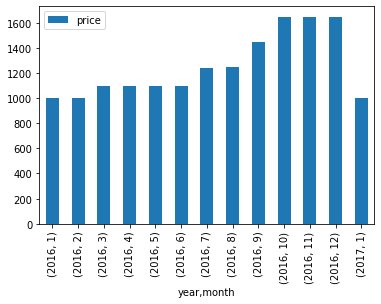

In [22]:
# Max price by month
df_c.groupby(['year','month'])[['price']].max().plot(kind="bar");

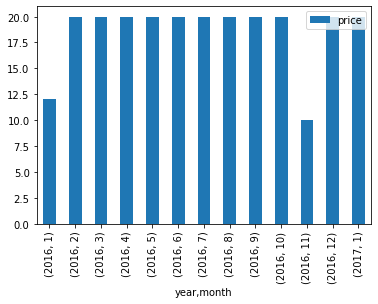

In [23]:
# Min price by Month
df_c.groupby(['year','month'])[['price']].min().plot(kind="bar");

## Answer
### Mean Analysis
It seems that June and August are the peak months. 

January has the lowest price with prices picking up around April and May before the peak and then a small jump again after peak in November and December as well.

### Max Analysis
It looks like October Novemeber and December have the highest prices. This could be due to last minute holiday traveling for Thanksgiving and Christmas, or luxury vacations during that time as well.

### Min Analysis
The min analysis doesn't provide too much information and is not helpful.


## 3. How does the neighborhood affect the pricing in Seattle?

In [24]:
print(df_l.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))

                             price
neighbourhood_cleansed            
Southeast Magnolia      231.705882
Portage Bay             227.857143
Westlake                194.470588
West Queen Anne         187.769231
Montlake                182.789474
...                            ...
North Delridge           76.375000
Georgetown               76.125000
South Delridge           74.666667
Olympic Hills            71.687500
Rainier Beach            68.555556

[87 rows x 1 columns]


In [25]:
print(df_l.groupby(['neighbourhood_cleansed'])[['price']].max().sort_values(by='price',ascending=False))

                         price
neighbourhood_cleansed        
Roosevelt               1000.0
Belltown                 999.0
West Queen Anne          975.0
Southeast Magnolia       950.0
Westlake                 775.0
...                        ...
North Delridge           148.0
Riverview                129.0
Roxhill                  125.0
South Park               105.0
Georgetown                99.0

[87 rows x 1 columns]


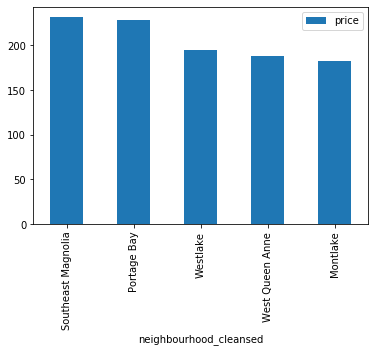

In [26]:
# Lets take a look at the top Neighbourhoods from our previous graph
df_l.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head().plot(kind='bar');

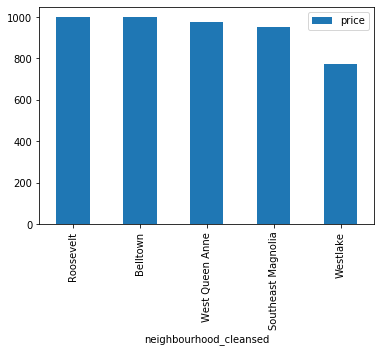

In [27]:
#Lets also look at the top neighbourhoods with based on max values instead of the mean
df_l.groupby(['neighbourhood_cleansed'])[['price']].max().sort_values(by='price',ascending=False).head().plot(kind='bar');

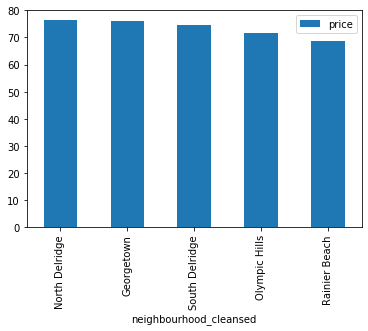

In [28]:
# We can find the inverse and look at the bottom 10 as well
df_l.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail().plot(kind='bar');

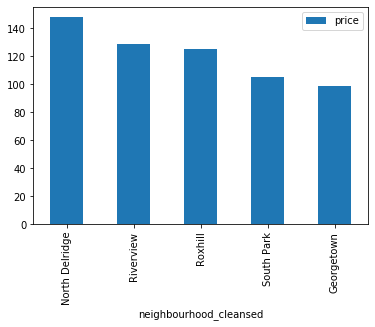

In [29]:
df_l.groupby(['neighbourhood_cleansed'])[['price']].max().sort_values(by='price',ascending=False).tail().plot(kind='bar');

### Max vs Mean of Neighbourhood Pricing
It looks like the Southeast Magnolia is in both graphs which supports the fact that it is one of the more expensive neighbourhoods. Georgetown and North Delridge are in the bottom of both Max and Mean.

Having similar neighbourhoods in both of these graphs should mean that the is significant influence of neighbourhood on the price.

## 4. How do the property types within neighbourhoods affect the price?

In [30]:
Top_Hoods = ('Southeast Magnolia','Portage Bay','Westlake','West Queen Anne','Montlake')
Top_Types = ('Apartment','House')
df_l_1 = df_l.loc[df_l['neighbourhood_cleansed'].isin(Top_Hoods)]
df_l_2 = df_l_1.loc[df_l['property_type'].isin(Top_Types)]
df_top_hoods = df_l_2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()


In [31]:
price_array = df_top_hoods['price'].values
price_array = np.reshape(price_array, (5,2))
price_array.shape

(5, 2)

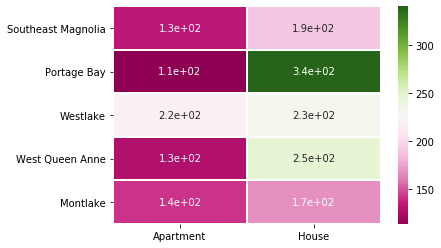

In [32]:
#HeatMaps Reference https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# Create Lists from Top Hoods and Top Types
Top_Hoods_list = list(Top_Hoods)
Top_Types_list = list(Top_Types)
df = pd.DataFrame(price_array, index=Top_Hoods_list, columns=Top_Types_list)

sns.heatmap(df, cmap='PiYG', linewidths=1.0, annot=True);

### Answer

Green indicates a more expensive average price, while the darker purple the lower price. Houses for all the neighborhoods seem to be more expensive, with Portage Bay being by far the most expensive. Apartments are much more affordable after that. Let us repeat the same analysis for the "Max values" instead of the highest Means to see how much it differs.

In [33]:
Top_Hoods_Max = ('Roosevelt','Belltown','West Queen Anne','Southeast Magnolia','Westlake')
Top_Types_Max = ('Apartment','House')
df_l_1 = df_l.loc[df_l['neighbourhood_cleansed'].isin(Top_Hoods_Max)]
df_l_2 = df_l_1.loc[df_l['property_type'].isin(Top_Types_Max)]
df_top_hoods_max = df_l_2.groupby(['neighbourhood_cleansed','property_type'])[['price']].mean().reset_index()

In [34]:
price_array_max = df_top_hoods_max['price'].values
price_array_max = np.reshape(price_array_max, (5,2))
price_array_max.shape

(5, 2)

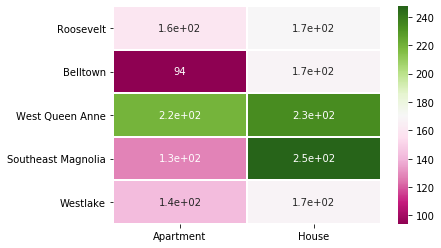

In [35]:
#HeatMaps Reference https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
# Create Lists from Top Hoods and Top Types
Top_Hoods_max_list = list(Top_Hoods_Max)
Top_Types_max_list = list(Top_Types_Max)
df = pd.DataFrame(price_array_max, index=Top_Hoods_max_list, columns=Top_Types_max_list)

sns.heatmap(df, cmap='PiYG', linewidths=1.0, annot=True);

### Max Analysis
It seems like a similar effect is happening that Houses are much more expensive than Apartments when looking at it from the Max perspective.

### 5. How do review ratings affect the price?



In [36]:
###First thing we need to do is create a DF with all of the Review information from the Listings dataset
df_confusion=df_l[['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',
                   'review_scores_communication', 'review_scores_location', 'review_scores_value','price']]

In [37]:
df_confusion

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0,975.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,450.0
...,...,...,...,...,...,...,...,...
3813,80.0,8.0,10.0,4.0,8.0,10.0,8.0,359.0
3814,100.0,10.0,10.0,10.0,10.0,10.0,10.0,79.0
3815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0
3816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0


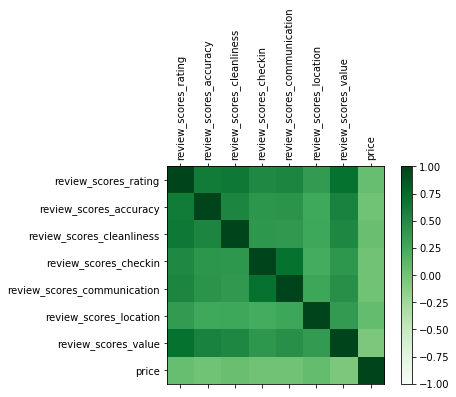

In [38]:


def matrix(df_reviews):
    """
    Makes confusion matrix for each pair of columns in df_confusion
    input:  
    df: makes Pandas dataframe>> df_confusion
     
    output: 
    matrix that presents the  shows the relationship of variables in the dataframe Green to White>> shows low to high correlation
    Dark Green shows the identity to itself (100%) - The relationship to itself.
    """
    fig=plt.figure()
    axis=fig.add_subplot(111)
    coloraxis = axis.matshow(df_confusion.corr(),cmap='Greens', vmin=-1, vmax=1)
    fig.colorbar(coloraxis)
    ticks = np.arange(0,len(df_confusion.columns),1)
    axis.set_xticks(ticks)
    plt.xticks(rotation=90)
    axis.set_yticks(ticks)
    axis.set_xticklabels(df_confusion.columns)
    axis.set_yticklabels(df_confusion.columns)
    plt.show()
##creating a confusion matrix for review ratings
matrix(df_confusion)



# Answer
Based on the plot above, there does not seem to be a large significant effect from the reviews. So I believe there to be very little relationship with the types of review attributes and the price. 

# Conclusion
It seems that the old saying in real estate of "Location, Location, Location" is the most important is confirmed by this analysis. Neighbourhood and property type are by far the strongest indicators here that helps to determine price. 